In [ ]:
install.packages("tidytext")
install.packages("ggcorrplot")
install.packages('tm')
install.packages('SnowballC')

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [ ]:
#load libraries
library(tidytext)
library(tidyverse)
library(glue)
library(stringr)
library(tm)
library(SnowballC)

In [ ]:
dataset<- read.csv("CAvideos.csv")
head(dataset)

In [6]:
#Number of records
nrow(dataset)

[1] 40881

In [7]:
#number of attributes
ncol(dataset)

[1] 16

In [8]:
#total number of unique videos
uniquevideos<- table(dataset$video_id)
length(uniquevideos)

[1] 24427

In [10]:
uniquetitles<- table(dataset$title)
length(uniquetitles)

[1] 24573

In [5]:
# list of useful columns in datasets
#cols <- c(1, 4:8, 10) --> select diff columns
#df[,cols]
dataset2 <- c(1, 8:11)
dataset[,cols]

views,likes,dislikes,comment_count
<int>,<int>,<int>,<int>
17158579,787425,43420,125882
1014651,127794,1688,13030
3191434,146035,5339,8181
2095828,132239,1989,17518
33523622,1634130,21082,85067
1309699,103755,4613,12143
2987945,187464,9850,26629
748374,57534,2967,15959
4477587,292837,4123,36391


In [12]:
selected_cols <- dataset %>% select(views,likes,dislikes, comment_count)

corr <- round(cor(selected_cols), 2)

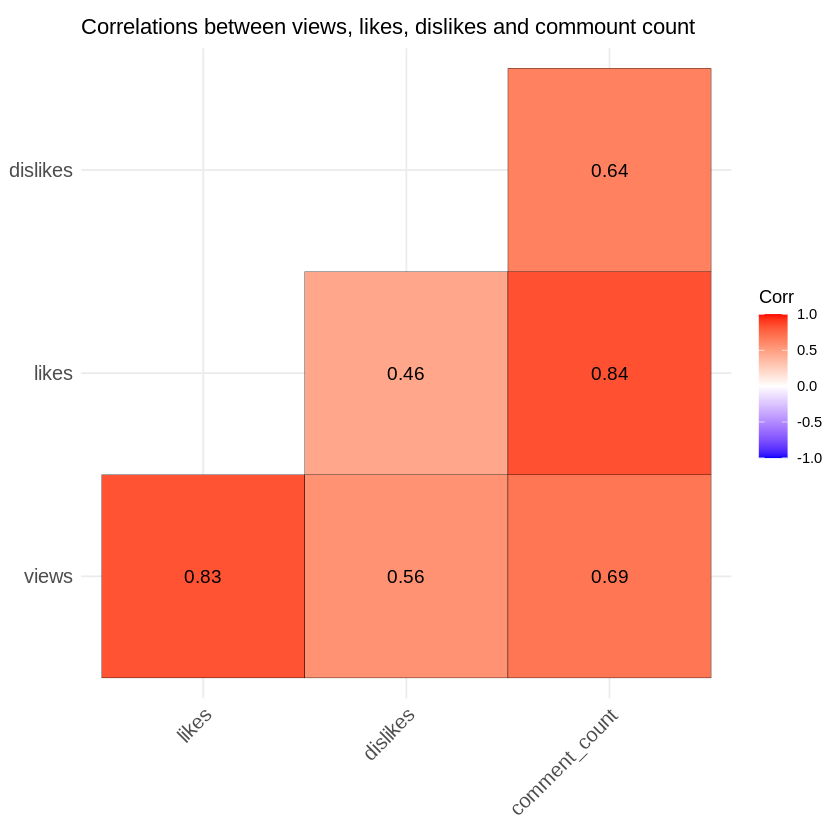

In [16]:
ggcorrplot(corr, method = "square", 
           ggtheme = ggplot2::theme_minimal,
           type = "lower",
           title = "Correlations between views, likes, dislikes and commount count",
           outline.col = "black",
           colors = c("blue","white", "red"),
           lab = TRUE,
           digits = 2)

In [9]:
docs <- Corpus(VectorSource(dataset$title))

In [ ]:
#Eliminating unwanted characters
toSpace <- content_transformer(function (x , pattern ) gsub(pattern, " ", x))
docs <- tm_map(docs, toSpace, "/")
docs <- tm_map(docs, toSpace, "@")
docs <- tm_map(docs, toSpace, "\\|")
                               # Converting to lower case
docs <- tm_map(docs, content_transformer(tolower))
# Removing numbers
docs <- tm_map(docs, removeNumbers)
# Remove english common stopwords
docs <- tm_map(docs, removeWords, stopwords("english"))
# Removing the words video and audio
docs <- tm_map(docs, removeWords, c("video", "audio")) 

# Removing punctuations
docs <- tm_map(docs, removePunctuation)
# Eliminate extra white spaces
docs <- tm_map(docs, stripWhitespace)

#Converting to matrix
title<- TermDocumentMatrix(docs)
m.matrix <- as.matrix(title)
title_sort <- sort(rowSums(m.matrix),decreasing=TRUE)

Warning message in tm_map.SimpleCorpus(docs, toSpace, "/"):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(docs, toSpace, "@"):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(docs, toSpace, "\\|"):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(docs, content_transformer(tolower)):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(docs, removeNumbers):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(docs, removeWords, stopwords("english")):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(docs, removeWords, c("video", "audio")):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(docs, removePunctuation):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(docs, stripWhitespace):
“transformation drops documents”


In [2]:
df_title <- data.frame(word = names(title_sort),freq=title_sort)

options(repr.plot.width = 10, repr.plot.height = 10)

ggplot(df_title[1:10,],aes(y = reorder(word,freq),x = freq))+geom_col()+ylab('category')+theme(axis.text.y = element_text(color = "grey20", size = 20, hjust = .5, vjust = .5, face = "plain"))

ERROR: Error in data.frame(word = names(title_sort), freq = title_sort): object 'title_sort' not found
